<a href="https://colab.research.google.com/github/ejlopezmor/ML-Applied/blob/main/Forecasting_with_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Multivariate Time Series with Random Forest

In [1]:
#################################################################
#################################################################
#####   Program Forecasting with Random Forest               ####
#####   Creation Date: 20200925                              ####
#####   Last edition Date: 20200925                          ####
#####   Author: Edgar Javier López Moreno                    ####  
#####   E-mail: ejlopem@alqueria.com.co                      ####
#################################################################
#################################################################

#################################################################
#####                        Library                        #####   
#################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #----- libreria para visualización
from google.colab import files

import folium #-------- Libreria para mapas
from folium.plugins import HeatMap

from math import cos, asin, sqrt,sin,pi #---Importamos las funciones coseno, arcoseno, raíz cuadrada, seno y el número pi

import statsmodels.api as sm #----- paquete de python para estadistica
import statsmodels.formula.api as smf

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error

# Verificar la importacion de estos paquetes

# conda install-c anaconda python-graphviz
# xgboost, pydotplus 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score
from io import StringIO
from IPython.display import Image, SVG
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import GridSearchCV
#import xgboost as xgb

from lightgbm import LGBMRegressor

from os.path import expanduser as ospath
import time
from datetime import datetime
import io
pd.options.display.max_columns = 200

#################################################################
#####                        Folders                        #####   
#################################################################   

################
## Local Files
################

#folder_input   = "G:\\Mi unidad\\1 Proyectos\\1 Recuperación Clientes - GoToMarket\\inpath\\"
#folder_output  = "G:\\Mi unidad\\1 Proyectos\\1 Recuperación Clientes - GoToMarket\\outpath\\"

#db_BTA_N = pd.read_csv(folder_inpath + 'DB CLUSTER BOGOTA NORTE.csv')
#db_BTA_C = pd.read_csv(folder_inpath + 'DB CLUSTER BOGOTA CENTRO.csv')
#db_BTA_S = pd.read_csv(folder_inpath + 'DB CLUSTER BOGOTA SUR.csv')

#db_cluster = pd.concat([db_BTA_N, db_BTA_C, db_BTA_S])
#db_cluster

################
## Drive Files
################

uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving DB CLUSTER BOGOTA CENTRO.csv to DB CLUSTER BOGOTA CENTRO.csv
Saving DB CLUSTER BOGOTA SUR.csv to DB CLUSTER BOGOTA SUR.csv
Saving DB CLUSTER BOGOTA NORTE.csv to DB CLUSTER BOGOTA NORTE.csv


In [9]:
db_BTA_C = pd.read_csv(io.BytesIO(uploaded['DB CLUSTER BOGOTA CENTRO.csv']))
db_BTA_N = pd.read_csv(io.BytesIO(uploaded['DB CLUSTER BOGOTA NORTE.csv']))
db_BTA_S = pd.read_csv(io.BytesIO(uploaded['DB CLUSTER BOGOTA SUR.csv']))

db_cluster = pd.concat([db_BTA_N, db_BTA_C, db_BTA_S])
db_cluster.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (49,50,51,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,TIPOLOGIA,CODIGO_CLIENTE,PERIODO,NUM.PEDIDOS,NUM.ARTICULOS,LIT.NETO,VALOR.NETO,CODI_EMPRESA,NOMB_CLIENTE,CIUD_CLIENTE,CODI_CANALSUPE,CODI_CANAL,CODI_DISTRITO,CODI_ZONA,CODI_REGION,CODI_CIUDAD,SECUENCIA,PK_CLIENTE,NOMBRE_CANALSUPE,NOMBRE_CANAL,NOMBRE_DISTRITO,NOMBRE_ZONA,NOMBRE_REGIONAL,CODI_REGIONAL,NOMBRE_REGION,NOMBRE_EMPRESA,ESTRATO_CLIENTE,CODI_RUTA,NOMBRE_RUTA,CODIGO_VENDEDOR,NOMBRE_VENDEDOR,ESTADO_CLIENTE,DIA_VISITA,CODI_RUTA_VISITA,NOMBRE_RUTA_VISITA,DIA_ENTREGA,NOMBRE_TIPOLOGIA,CODI_CANALASOC,NOMBRE_CANALASOC,FORMATO_SM,SEGMENTACION_LECHE,SEGMENTACION_YOGUR,NOMBRE_SEGMENTA_LECHE,NOMBRE_SEGMENTA_YOGUR,CODIGO_REGIONSUPE,REGIONAL_SUPERIOR,CODIGO_SECTOR,SECTOR,CLUSTER.AT,CLUSTER.PN,CLUSTER.TR,CLUSTER.TV,CLUSTER.PF,CLUSTER.RE,CLUSTER,COOR_X,COOR_Y
0,1,AT,000338 001,201901,9,149,2243.43,6312931.0,GA,CASTELLANOS NELSON ENRIQUE,ZIPAQUIR<c1>,PV,SI,6,6,SAB,25899,1,413542,PREVENTA,SUPERETES INDIRECTOS,Distrito6,ZONA 06,REGIONAL SABANA NORTE,RSN,SABANA,Productos Naturales de la Sabana SA ...,2,C0048,RUTA 048,PB512,JONATAN DAVID MUNOZ FIGUEROA,ACTIVO,100100,RB512,RUTA DE VISITA CAJICA 512,10010,AUTOSERVICIO,TT,TIENDA A TIENDA,NO APLICA,A1,A1,PROTEGER,PROTEGER,RBO,BOGOT<c1>,NTE,NORTE,MANTIENEN,0,0,0,0,0,MANTIENEN,-73.9929,5.034267
1,2,AT,000338 001,201902,9,155,2380.35,6867973.0,GA,CASTELLANOS NELSON ENRIQUE,ZIPAQUIR<c1>,PV,SI,6,6,SAB,25899,1,413542,PREVENTA,SUPERETES INDIRECTOS,Distrito6,ZONA 06,REGIONAL SABANA NORTE,RSN,SABANA,Productos Naturales de la Sabana SA ...,2,C0048,RUTA 048,PB512,JONATAN DAVID MUNOZ FIGUEROA,ACTIVO,100100,RB512,RUTA DE VISITA CAJICA 512,10010,AUTOSERVICIO,TT,TIENDA A TIENDA,NO APLICA,A1,A1,PROTEGER,PROTEGER,RBO,BOGOT<c1>,NTE,NORTE,MANTIENEN,0,0,0,0,0,MANTIENEN,-73.9929,5.034267
2,3,AT,000338 001,201903,10,196,2646.47,7480270.0,GA,CASTELLANOS NELSON ENRIQUE,ZIPAQUIR<c1>,PV,SI,6,6,SAB,25899,1,413542,PREVENTA,SUPERETES INDIRECTOS,Distrito6,ZONA 06,REGIONAL SABANA NORTE,RSN,SABANA,Productos Naturales de la Sabana SA ...,2,C0048,RUTA 048,PB512,JONATAN DAVID MUNOZ FIGUEROA,ACTIVO,100100,RB512,RUTA DE VISITA CAJICA 512,10010,AUTOSERVICIO,TT,TIENDA A TIENDA,NO APLICA,A1,A1,PROTEGER,PROTEGER,RBO,BOGOT<c1>,NTE,NORTE,MANTIENEN,0,0,0,0,0,MANTIENEN,-73.9929,5.034267
3,4,AT,000338 001,201904,9,196,2010.03,5972747.0,GA,CASTELLANOS NELSON ENRIQUE,ZIPAQUIR<c1>,PV,SI,6,6,SAB,25899,1,413542,PREVENTA,SUPERETES INDIRECTOS,Distrito6,ZONA 06,REGIONAL SABANA NORTE,RSN,SABANA,Productos Naturales de la Sabana SA ...,2,C0048,RUTA 048,PB512,JONATAN DAVID MUNOZ FIGUEROA,ACTIVO,100100,RB512,RUTA DE VISITA CAJICA 512,10010,AUTOSERVICIO,TT,TIENDA A TIENDA,NO APLICA,A1,A1,PROTEGER,PROTEGER,RBO,BOGOT<c1>,NTE,NORTE,MANTIENEN,0,0,0,0,0,MANTIENEN,-73.9929,5.034267
4,5,AT,000338 001,201905,10,196,2766.78,7982255.0,GA,CASTELLANOS NELSON ENRIQUE,ZIPAQUIR<c1>,PV,SI,6,6,SAB,25899,1,413542,PREVENTA,SUPERETES INDIRECTOS,Distrito6,ZONA 06,REGIONAL SABANA NORTE,RSN,SABANA,Productos Naturales de la Sabana SA ...,2,C0048,RUTA 048,PB512,JONATAN DAVID MUNOZ FIGUEROA,ACTIVO,100100,RB512,RUTA DE VISITA CAJICA 512,10010,AUTOSERVICIO,TT,TIENDA A TIENDA,NO APLICA,A1,A1,PROTEGER,PROTEGER,RBO,BOGOT<c1>,NTE,NORTE,MANTIENEN,0,0,0,0,0,MANTIENEN,-73.9929,5.034267


# Functional variable

In [10]:
PRED_FUNCTION = 202011

# Model Implementation

In [11]:
db_cluster.CODIGO_CLIENTE.unique().shape

(38775,)

In [12]:
db_id = pd.DataFrame({'CODIGO_CLIENTE': list(db_cluster.CODIGO_CLIENTE.unique()), 'ID_CLIENTE': list(range(1, 38776))})
db_cluster = pd.merge(db_cluster, db_id, how='inner', on=['CODIGO_CLIENTE'])

## Model Database

In [13]:
###############################
### Model Database
###############################

DB_MODEL = db_cluster.groupby(["TIPOLOGIA", "ID_CLIENTE", "PERIODO", "NOMBRE_SEGMENTA_LECHE", "CODI_DISTRITO",
                               "CODI_CANAL", "CLUSTER", "COOR_X", "COOR_Y"])["LIT.NETO", "VALOR.NETO"].sum()
DB_MODEL = DB_MODEL.add_suffix('').reset_index()
DB_MODEL.columns = ["TIPOLOGIA", "ID_CLIENTE", "PERIODO", "NOMBRE_SEGMENTA_LECHE", "CODI_DISTRITO",
                    "CODI_CANAL", "CLUSTER", "COOR_X", "COOR_Y", "LIT_NETO","VALOR_NETO"]
DB_MODEL = DB_MODEL.sort_values(by=["ID_CLIENTE", "PERIODO"], ascending=True)
DB_MODEL["PERIODO"] = DB_MODEL["PERIODO"].astype(int) 
DB_MODEL.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,TIPOLOGIA,ID_CLIENTE,PERIODO,NOMBRE_SEGMENTA_LECHE,CODI_DISTRITO,CODI_CANAL,CLUSTER,COOR_X,COOR_Y,LIT_NETO,VALOR_NETO
0,AT,1,201901,PROTEGER,6,SI,MANTIENEN,-73.9929,5.034267,2243.43,6312931.0
1,AT,1,201902,PROTEGER,6,SI,MANTIENEN,-73.9929,5.034267,2380.35,6867973.0
2,AT,1,201903,PROTEGER,6,SI,MANTIENEN,-73.9929,5.034267,2646.47,7480270.0
3,AT,1,201904,PROTEGER,6,SI,MANTIENEN,-73.9929,5.034267,2010.03,5972747.0
4,AT,1,201905,PROTEGER,6,SI,MANTIENEN,-73.9929,5.034267,2766.78,7982255.0


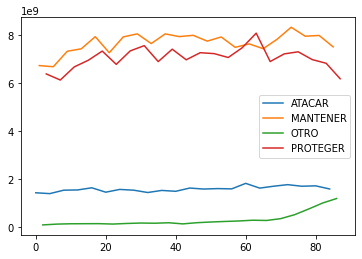

In [14]:
###############################
### Descriptive
###############################

DB_DESC = DB_MODEL.groupby(["PERIODO", "NOMBRE_SEGMENTA_LECHE"])["VALOR_NETO"].sum()
DB_DESC = DB_DESC.add_suffix('').reset_index()
DB_DESC.columns = ["PERIODO", "NOMBRE_SEGMENTA_LECHE", "VALOR_NETO"]
DB_DESC = DB_DESC.sort_values(by=["PERIODO", "NOMBRE_SEGMENTA_LECHE"], ascending=True)
DB_DESC["PERIODO"] = DB_DESC["PERIODO"].astype(int) 

DB_DESC.groupby('NOMBRE_SEGMENTA_LECHE')['VALOR_NETO'].plot(legend='True')
plt.show()

## Categorized Database

In [15]:
###############################
### Categorization
###############################

melt = DB_MODEL.copy()

tipo_dummies = pd.get_dummies(melt.TIPOLOGIA, drop_first=True)
melt = pd.concat([melt, tipo_dummies], axis=1)

segm_dummies = pd.get_dummies(melt.NOMBRE_SEGMENTA_LECHE, drop_first=True)
melt = pd.concat([melt, segm_dummies], axis=1)

distrito_dummies = pd.get_dummies(melt.CODI_DISTRITO, drop_first=True)
melt = pd.concat([melt, distrito_dummies], axis=1)

canal_dummies = pd.get_dummies(melt.CODI_CANAL, drop_first=True)
melt = pd.concat([melt, canal_dummies], axis=1)

clust_dummies = pd.get_dummies(melt.CLUSTER, drop_first=True)
melt = pd.concat([melt, clust_dummies], axis=1)

melt['Last_Month_Sales'] = melt.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift()
melt['Last_Month_Diff_S'] = melt.groupby(['ID_CLIENTE'])['Last_Month_Sales'].diff()
melt['Last-1_Month_Sales'] = melt.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift(2)
melt['Last-1_Month_Diff_S'] = melt.groupby(['ID_CLIENTE'])['Last-1_Month_Sales'].diff()
melt['Last-2_Month_Sales'] = melt.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift(3)
melt['Last-2_Month_Diff_S'] = melt.groupby(['ID_CLIENTE'])['Last-2_Month_Sales'].diff()
melt['Last-3_Month_Sales'] = melt.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift(4)
melt['Last-3_Month_Diff_S'] = melt.groupby(['ID_CLIENTE'])['Last-3_Month_Sales'].diff()
melt['Last-4_Month_Sales'] = melt.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift(5)
melt['Last-4_Month_Diff_S'] = melt.groupby(['ID_CLIENTE'])['Last-4_Month_Sales'].diff()
melt['Last-5_Month_Sales'] = melt.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift(6)
melt['Last-5_Month_Diff_S'] = melt.groupby(['ID_CLIENTE'])['Last-5_Month_Sales'].diff()
melt['Last-6_Month_Sales'] = melt.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift(7)
melt['Last-6_Month_Diff_S'] = melt.groupby(['ID_CLIENTE'])['Last-6_Month_Sales'].diff()

melt['Last_Month_Liters'] = melt.groupby(['ID_CLIENTE'])['LIT_NETO'].shift()
melt['Last_Month_Diff_L'] = melt.groupby(['ID_CLIENTE'])['Last_Month_Liters'].diff()
melt['Last-1_Month_Liters'] = melt.groupby(['ID_CLIENTE'])['LIT_NETO'].shift(2)
melt['Last-1_Month_Diff_L'] = melt.groupby(['ID_CLIENTE'])['Last-1_Month_Liters'].diff()
melt['Last-2_Month_Liters'] = melt.groupby(['ID_CLIENTE'])['LIT_NETO'].shift(3)
melt['Last-2_Month_Diff_L'] = melt.groupby(['ID_CLIENTE'])['Last-2_Month_Liters'].diff()
melt['Last-3_Month_Liters'] = melt.groupby(['ID_CLIENTE'])['LIT_NETO'].shift(4)
melt['Last-3_Month_Diff_L'] = melt.groupby(['ID_CLIENTE'])['Last-3_Month_Liters'].diff()
melt['Last-4_Month_Liters'] = melt.groupby(['ID_CLIENTE'])['LIT_NETO'].shift(5)
melt['Last-4_Month_Diff_L'] = melt.groupby(['ID_CLIENTE'])['Last-4_Month_Liters'].diff()
melt['Last-5_Month_Liters'] = melt.groupby(['ID_CLIENTE'])['LIT_NETO'].shift(6)
melt['Last-5_Month_Diff_L'] = melt.groupby(['ID_CLIENTE'])['Last-5_Month_Liters'].diff()
melt['Last-6_Month_Liters'] = melt.groupby(['ID_CLIENTE'])['LIT_NETO'].shift(7)
melt['Last-6_Month_Diff_L'] = melt.groupby(['ID_CLIENTE'])['Last-6_Month_Liters'].diff()

melt = melt.dropna()
melt = melt.drop(["TIPOLOGIA", "NOMBRE_SEGMENTA_LECHE", "CODI_DISTRITO", "CODI_CANAL", "CLUSTER"], axis=1)
melt

,ID_CLIENTE,PERIODO,COOR_X,COOR_Y,LIT_NETO,VALOR_NETO,PF,PN,RE,TR,TV,MANTENER,OTRO,PROTEGER,2,3,4,5,6,7,11,12,13,14,15,16,17,18,21,22,26,PV,SI,MANTIENEN,OTRO,SUBEN,Last_Month_Sales,Last_Month_Diff_S,Last-1_Month_Sales,Last-1_Month_Diff_S,Last-2_Month_Sales,Last-2_Month_Diff_S,Last-3_Month_Sales,Last-3_Month_Diff_S,Last-4_Month_Sales,Last-4_Month_Diff_S,Last-5_Month_Sales,Last-5_Month_Diff_S,Last-6_Month_Sales,Last-6_Month_Diff_S,Last_Month_Liters,Last_Month_Diff_L,Last-1_Month_Liters,Last-1_Month_Diff_L,Last-2_Month_Liters,Last-2_Month_Diff_L,Last-3_Month_Liters,Last-3_Month_Diff_L,Last-4_Month_Liters,Last-4_Month_Diff_L,Last-5_Month_Liters,Last-5_Month_Diff_L,Last-6_Month_Liters,Last-6_Month_Diff_L
8,1,201909,-73.9929,5.034267,2465.08,7133067.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,8016597.0,760116.0,7256481.0,1929027.0,5327454.0,-2654801.0,7982255.0,2009508.0,5972747.0,-1507523.0,7480270.0,612297.0,6867973.0,555042.0,2795.55,297.19,2498.36,691.19,1807.17,-959.61,2766.78,756.75,2010.03,-636.44,2646.47,266.12,2380.35,136.92
9,1,201910,-73.9929,5.034267,2602.63,7722167.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,7133067.0,-883530.0,8016597.0,760116.0,7256481.0,1929027.0,5327454.0,-2654801.0,7982255.0,2009508.0,5972747.0,-1507523.0,7480270.0,612297.0,2465.08,-330.47,2795.55,297.19,2498.36,691.19,1807.17,-959.61,2766.78,756.75,2010.03,-636.44,2646.47,266.12
10,1,201911,-73.9929,5.034267,3272.12,9565365.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,7722167.0,589100.0,7133067.0,-883530.0,8016597.0,760116.0,7256481.0,1929027.0,5327454.0,-2654801.0,7982255.0,2009508.0,5972747.0,-1507523.0,2602.63,137.55,2465.08,-330.47,2795.55,297.19,2498.36,691.19,1807.17,-959.61,2766.78,756.75,2010.03,-636.44
11,1,201912,-73.9929,5.034267,3156.75,8897150.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,9565365.0,1843198.0,7722167.0,589100.0,7133067.0,-883530.0,8016597.0,760116.0,7256481.0,1929027.0,5327454.0,-2654801.0,7982255.0,2009508.0,3272.12,669.49,2602.63,137.55,2465.08,-330.47,2795.55,297.19,2498.36,691.19,1807.17,-959.61,2766.78,756.75
12,1,202001,-73.9929,5.034267,3196.63,8794647.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,8897150.0,-668215.0,9565365.0,1843198.0,7722167.0,589100.0,7133067.0,-883530.0,8016597.0,760116.0,7256481.0,1929027.0,5327454.0,-2654801.0,3156.75,-115.37,3272.12,669.49,2602.63,137.55,2465.08,-330.47,2795.55,297.19,2498.36,691.19,1807.17,-959.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686751,38775,202006,-74.1902,4.564872,63.96,182959.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,163884.0,-11276.0,175160.0,112172.0,62988.0,-112532.0,175520.0,-40206.0,215726.0,127655.0,88071.0,-49883.0,137954.0,-92101.0,63.72,-1.52,65.24,41.82,23.42,-42.64,66.06,-14.68,80.74,45.24,35.50,-15.70,51.20,-25.96
686752,38775,202007,-74.1902,4.564872,46.20,121032.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,182959.0,19075.0,163884.0,-11276.0,175160.0,112172.0,62988.0,-112532.0,175520.0,-40206.0,215726.0,127655.0,88071.0,-49883.0,63.96,0.24,63.72,-1.52,65.24,41.82,23.42,-42.64,66.06,-14.68,80.74,45.24,35.50,-15.70
686753,38775,202008,-74.1902,4.564872,48.30,121032.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,121032.0,-61927.0,182959.0,19075.0,163884.0,-11276.0,175160.0,112172.0,62988.0,-112532.0,175520.0,-40206.0,215726.0,127655.0,46.20,-17.76,63.96,0.24,63.72,-1.52,65.24,41.82,23.42,-42.64,66.06,-14.68,80.74,45.24
686754,38775,202009,-74.1902,4.564872,47.75,116116.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,121032.0,0.0,121032.0,-61927.0,182959.0,19075.0,163884.0,-11276.0,175160.0,112172.0,62988.0,-112532.0,175520.0,-40206.0,48.30,2.10,46.20,-17.76,63.96,0.24,63.72,-1.52,65.24

## Model Function

In [16]:
###############################
### Random Forest 
###############################

mean_error_litros = []
mean_error_ventas = []

for month in sorted(melt.PERIODO.unique()[4:50]):
    train = melt[melt['PERIODO'] <  month]
    val   = melt[melt['PERIODO'] == month]

    xtr, xts = train.drop(["LIT_NETO", "VALOR_NETO"], axis=1), val.drop(["LIT_NETO", "VALOR_NETO"], axis=1)
    ytr, yts = train[["LIT_NETO", "VALOR_NETO"]].values, val[["LIT_NETO", "VALOR_NETO"]].values

    mdl = RandomForestRegressor(n_estimators = 25, max_depth=6, random_state=0)
    mdl.fit(xtr, ytr)

    p = mdl.predict(xts)

    error_litros = round(mean_absolute_error(yts[:, 0], p[:, 0]), 2)
    print('month %d - Error_Litros %.5f' % (month, error_litros))
    mean_error_litros.append(error_litros)
    
    error_ventas = round(mean_absolute_error(yts[:, 1], p[:, 1]), 2)
    print('month %d - Error_Ventas %.5f' % (month, error_ventas))
    mean_error_ventas.append(error_ventas)
    
    print('          *********************        ')
    
print('Mean Error Litros = %.5f' % np.mean(mean_error_litros))
print('Mean Error Ventas = %.5f' % np.mean(mean_error_ventas))

month 202001 - Error_Litros 44.43000
month 202001 - Error_Ventas 111243.06000
          *********************        
month 202002 - Error_Litros 40.14000
month 202002 - Error_Ventas 103765.92000
          *********************        
month 202003 - Error_Litros 51.34000
month 202003 - Error_Ventas 139870.44000
          *********************        
month 202004 - Error_Litros 68.10000
month 202004 - Error_Ventas 196898.28000
          *********************        
month 202005 - Error_Litros 58.37000
month 202005 - Error_Ventas 151245.79000
          *********************        
month 202006 - Error_Litros 49.71000
month 202006 - Error_Ventas 122105.71000
          *********************        
month 202007 - Error_Litros 50.12000
month 202007 - Error_Ventas 126048.46000
          *********************        
month 202008 - Error_Litros 45.36000
month 202008 - Error_Ventas 112602.31000
          *********************        
month 202009 - Error_Litros 46.88000
month 202009 - Erro

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


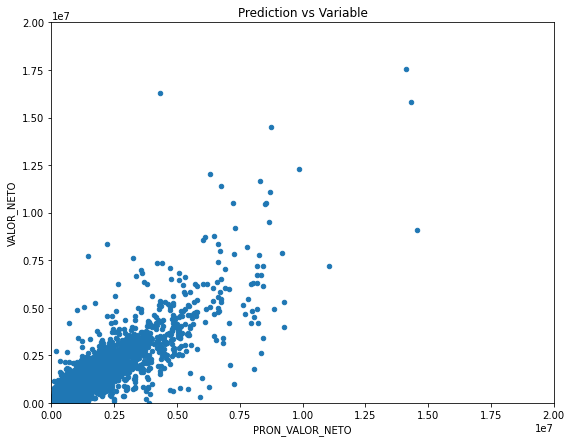

In [18]:
val.loc[:, ["PRON_LIT_NETO", "PRON_VALOR_NETO"]] = np.round(p)
val.plot.scatter(x='PRON_VALOR_NETO', y='VALOR_NETO', figsize=(9,7), title='Prediction vs Variable', 
                 ylim=(0, 20000000), xlim=(0, 20000000))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


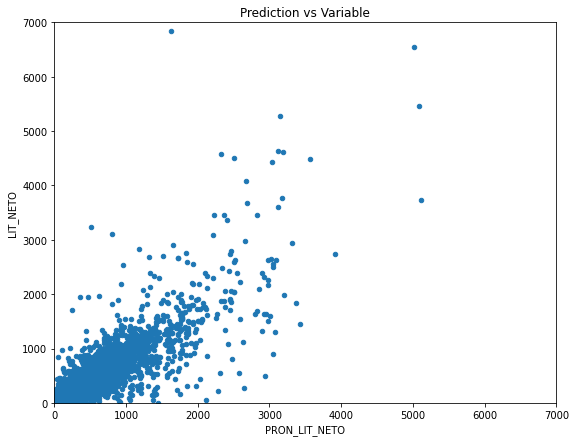

In [19]:
val.loc[:, ["PRON_LIT_NETO", "PRON_VALOR_NETO"]] = np.round(p)
val.plot.scatter(x='PRON_LIT_NETO', y='LIT_NETO', figsize=(9,7), title='Prediction vs Variable', 
                 ylim=(0, 7000), xlim=(0, 7000))

Variable: Last_Month_Sales     Importance: 0.89
Variable: Last-1_Month_Sales   Importance: 0.04
Variable: Last-1_Month_Liters  Importance: 0.04
Variable: Last-2_Month_Sales   Importance: 0.01
Variable: Last_Month_Liters    Importance: 0.01
Variable: ID_CLIENTE           Importance: 0.0
Variable: PERIODO              Importance: 0.0
Variable: COOR_X               Importance: 0.0
Variable: COOR_Y               Importance: 0.0
Variable: PF                   Importance: 0.0
Variable: PN                   Importance: 0.0
Variable: RE                   Importance: 0.0
Variable: TR                   Importance: 0.0
Variable: TV                   Importance: 0.0
Variable: MANTENER             Importance: 0.0
Variable: OTRO                 Importance: 0.0
Variable: PROTEGER             Importance: 0.0
Variable:                    2 Importance: 0.0
Variable:                    3 Importance: 0.0
Variable:                    4 Importance: 0.0
Variable:                    5 Importance: 0.0
Variable

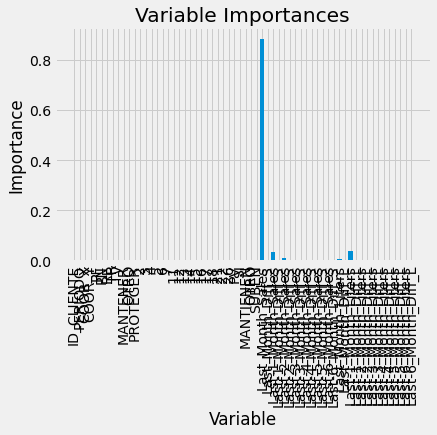

In [20]:
# Labels are the values we want to predict
labels = np.array(melt[["LIT_NETO", "VALOR_NETO"]])

# Remove the labels from the features
features     = melt.drop(["LIT_NETO", "VALOR_NETO"], axis = 1)
feature_list = list(features.columns)
features     = np.array(features)

# Get numerical feature importances
importances = list(mdl.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
#import matplotlib.pyplot as plt
#%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Forecasting Next Month

## Forecasting Database 

In [21]:
DB_PREDIC = DB_MODEL.copy()

DB_PREDIC_NEW = DB_PREDIC[DB_PREDIC.PERIODO == (PRED_FUNCTION-1)].copy()
DB_PREDIC_NEW["PERIODO"] = PRED_FUNCTION
DB_PREDIC_NEW["VALOR_NETO"] = 1
DB_PREDIC_NEW = DB_PREDIC_NEW[["TIPOLOGIA", "ID_CLIENTE", "PERIODO", "NOMBRE_SEGMENTA_LECHE", "CODI_DISTRITO",
                               "CODI_CANAL", "CLUSTER", "COOR_X", "COOR_Y", "LIT_NETO", "VALOR_NETO"]]

DB_PREDIC = pd.concat([DB_PREDIC, DB_PREDIC_NEW])
DB_PREDIC = DB_PREDIC.sort_values(by=['ID_CLIENTE', 'PERIODO'])

tipo_dummies = pd.get_dummies(DB_PREDIC.TIPOLOGIA, drop_first=True)
DB_PREDIC = pd.concat([DB_PREDIC, tipo_dummies], axis=1)

segm_dummies = pd.get_dummies(DB_PREDIC.NOMBRE_SEGMENTA_LECHE, drop_first=True)
DB_PREDIC = pd.concat([DB_PREDIC, segm_dummies], axis=1)

distrito_dummies = pd.get_dummies(DB_PREDIC.CODI_DISTRITO, drop_first=True)
DB_PREDIC = pd.concat([DB_PREDIC, distrito_dummies], axis=1)

canal_dummies = pd.get_dummies(DB_PREDIC.CODI_CANAL, drop_first=True)
DB_PREDIC = pd.concat([DB_PREDIC, canal_dummies], axis=1)

clust_dummies = pd.get_dummies(DB_PREDIC.CLUSTER, drop_first=True)
DB_PREDIC = pd.concat([DB_PREDIC, clust_dummies], axis=1)


DB_PREDIC['Last_Month_Sales'] = DB_PREDIC.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift()
DB_PREDIC['Last_Month_Diff_S'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last_Month_Sales'].diff()
DB_PREDIC['Last-1_Month_Sales'] = DB_PREDIC.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift(2)
DB_PREDIC['Last-1_Month_Diff_S'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last-1_Month_Sales'].diff()
DB_PREDIC['Last-2_Month_Sales'] = DB_PREDIC.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift(3)
DB_PREDIC['Last-2_Month_Diff_S'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last-2_Month_Sales'].diff()
DB_PREDIC['Last-3_Month_Sales'] = DB_PREDIC.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift(4)
DB_PREDIC['Last-3_Month_Diff_S'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last-3_Month_Sales'].diff()
DB_PREDIC['Last-4_Month_Sales'] = DB_PREDIC.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift(5)
DB_PREDIC['Last-4_Month_Diff_S'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last-4_Month_Sales'].diff()
DB_PREDIC['Last-5_Month_Sales'] = DB_PREDIC.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift(6)
DB_PREDIC['Last-5_Month_Diff_S'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last-5_Month_Sales'].diff()
DB_PREDIC['Last-6_Month_Sales'] = DB_PREDIC.groupby(['ID_CLIENTE'])['VALOR_NETO'].shift(7)
DB_PREDIC['Last-6_Month_Diff_S'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last-6_Month_Sales'].diff()

DB_PREDIC['Last_Month_Liters'] = DB_PREDIC.groupby(['ID_CLIENTE'])['LIT_NETO'].shift()
DB_PREDIC['Last_Month_Diff_L'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last_Month_Liters'].diff()
DB_PREDIC['Last-1_Month_Liters'] = DB_PREDIC.groupby(['ID_CLIENTE'])['LIT_NETO'].shift(2)
DB_PREDIC['Last-1_Month_Diff_L'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last-1_Month_Liters'].diff()
DB_PREDIC['Last-2_Month_Liters'] = DB_PREDIC.groupby(['ID_CLIENTE'])['LIT_NETO'].shift(3)
DB_PREDIC['Last-2_Month_Diff_L'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last-2_Month_Liters'].diff()
DB_PREDIC['Last-3_Month_Liters'] = DB_PREDIC.groupby(['ID_CLIENTE'])['LIT_NETO'].shift(4)
DB_PREDIC['Last-3_Month_Diff_L'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last-3_Month_Liters'].diff()
DB_PREDIC['Last-4_Month_Liters'] = DB_PREDIC.groupby(['ID_CLIENTE'])['LIT_NETO'].shift(5)
DB_PREDIC['Last-4_Month_Diff_L'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last-4_Month_Liters'].diff()
DB_PREDIC['Last-5_Month_Liters'] = DB_PREDIC.groupby(['ID_CLIENTE'])['LIT_NETO'].shift(6)
DB_PREDIC['Last-5_Month_Diff_L'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last-5_Month_Liters'].diff()
DB_PREDIC['Last-6_Month_Liters'] = DB_PREDIC.groupby(['ID_CLIENTE'])['LIT_NETO'].shift(7)
DB_PREDIC['Last-6_Month_Diff_L'] = DB_PREDIC.groupby(['ID_CLIENTE'])['Last-6_Month_Liters'].diff()

DB_PREDIC = DB_PREDIC.dropna()
DB_PREDIC = DB_PREDIC.drop(["TIPOLOGIA", "NOMBRE_SEGMENTA_LECHE", "CODI_DISTRITO", "CODI_CANAL", "CLUSTER"], axis=1)
DB_PREDIC

,ID_CLIENTE,PERIODO,COOR_X,COOR_Y,LIT_NETO,VALOR_NETO,PF,PN,RE,TR,TV,MANTENER,OTRO,PROTEGER,2,3,4,5,6,7,11,12,13,14,15,16,17,18,21,22,26,PV,SI,MANTIENEN,OTRO,SUBEN,Last_Month_Sales,Last_Month_Diff_S,Last-1_Month_Sales,Last-1_Month_Diff_S,Last-2_Month_Sales,Last-2_Month_Diff_S,Last-3_Month_Sales,Last-3_Month_Diff_S,Last-4_Month_Sales,Last-4_Month_Diff_S,Last-5_Month_Sales,Last-5_Month_Diff_S,Last-6_Month_Sales,Last-6_Month_Diff_S,Last_Month_Liters,Last_Month_Diff_L,Last-1_Month_Liters,Last-1_Month_Diff_L,Last-2_Month_Liters,Last-2_Month_Diff_L,Last-3_Month_Liters,Last-3_Month_Diff_L,Last-4_Month_Liters,Last-4_Month_Diff_L,Last-5_Month_Liters,Last-5_Month_Diff_L,Last-6_Month_Liters,Last-6_Month_Diff_L
8,1,201909,-73.9929,5.034267,2465.08,7133067.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,8016597.0,760116.0,7256481.0,1929027.0,5327454.0,-2654801.0,7982255.0,2009508.0,5972747.0,-1507523.0,7480270.0,612297.0,6867973.0,555042.0,2795.55,297.19,2498.36,691.19,1807.17,-959.61,2766.78,756.75,2010.03,-636.44,2646.47,266.12,2380.35,136.92
9,1,201910,-73.9929,5.034267,2602.63,7722167.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,7133067.0,-883530.0,8016597.0,760116.0,7256481.0,1929027.0,5327454.0,-2654801.0,7982255.0,2009508.0,5972747.0,-1507523.0,7480270.0,612297.0,2465.08,-330.47,2795.55,297.19,2498.36,691.19,1807.17,-959.61,2766.78,756.75,2010.03,-636.44,2646.47,266.12
10,1,201911,-73.9929,5.034267,3272.12,9565365.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,7722167.0,589100.0,7133067.0,-883530.0,8016597.0,760116.0,7256481.0,1929027.0,5327454.0,-2654801.0,7982255.0,2009508.0,5972747.0,-1507523.0,2602.63,137.55,2465.08,-330.47,2795.55,297.19,2498.36,691.19,1807.17,-959.61,2766.78,756.75,2010.03,-636.44
11,1,201912,-73.9929,5.034267,3156.75,8897150.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,9565365.0,1843198.0,7722167.0,589100.0,7133067.0,-883530.0,8016597.0,760116.0,7256481.0,1929027.0,5327454.0,-2654801.0,7982255.0,2009508.0,3272.12,669.49,2602.63,137.55,2465.08,-330.47,2795.55,297.19,2498.36,691.19,1807.17,-959.61,2766.78,756.75
12,1,202001,-73.9929,5.034267,3196.63,8794647.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,8897150.0,-668215.0,9565365.0,1843198.0,7722167.0,589100.0,7133067.0,-883530.0,8016597.0,760116.0,7256481.0,1929027.0,5327454.0,-2654801.0,3156.75,-115.37,3272.12,669.49,2602.63,137.55,2465.08,-330.47,2795.55,297.19,2498.36,691.19,1807.17,-959.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686752,38775,202007,-74.1902,4.564872,46.20,121032.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,182959.0,19075.0,163884.0,-11276.0,175160.0,112172.0,62988.0,-112532.0,175520.0,-40206.0,215726.0,127655.0,88071.0,-49883.0,63.96,0.24,63.72,-1.52,65.24,41.82,23.42,-42.64,66.06,-14.68,80.74,45.24,35.50,-15.70
686753,38775,202008,-74.1902,4.564872,48.30,121032.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,121032.0,-61927.0,182959.0,19075.0,163884.0,-11276.0,175160.0,112172.0,62988.0,-112532.0,175520.0,-40206.0,215726.0,127655.0,46.20,-17.76,63.96,0.24,63.72,-1.52,65.24,41.82,23.42,-42.64,66.06,-14.68,80.74,45.24
686754,38775,202009,-74.1902,4.564872,47.75,116116.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,121032.0,0.0,121032.0,-61927.0,182959.0,19075.0,163884.0,-11276.0,175160.0,112172.0,62988.0,-112532.0,175520.0,-40206.0,48.30,2.10,46.20,-17.76,63.96,0.24,63.72,-1.52,65.24,41.82,23.42,-42.64,66.06,-14.68
686755,38775,202010,-74.1902,4.564872,62.20,159080.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,116116.0,-4916.0,121032.0,0.0,121032.0,-61927.0,182959.0,19075.0,163884.0,-11276.0,175160.0,112172.0,62988.0,-112532.0,47.75,-0.55,48.30,2.10,46.20,-17.76,63.96,0.24,63.72,-1.52,65

In [22]:
DB_PREDIC_NEW = DB_PREDIC.drop(["LIT_NETO", "VALOR_NETO"], axis=1)
DB_PREDIC_NEW = DB_PREDIC_NEW[DB_PREDIC_NEW.PERIODO == PRED_FUNCTION]
DB_PREDIC_NEW.ID_CLIENTE = DB_PREDIC_NEW.ID_CLIENTE.astype(int)
DB_PREDIC_NEW.COOR_X     = DB_PREDIC_NEW.COOR_X.astype(float)
DB_PREDIC_NEW.COOR_Y     = DB_PREDIC_NEW.COOR_Y.astype(float)
DB_PREDIC_NEW

,ID_CLIENTE,PERIODO,COOR_X,COOR_Y,PF,PN,RE,TR,TV,MANTENER,OTRO,PROTEGER,2,3,4,5,6,7,11,12,13,14,15,16,17,18,21,22,26,PV,SI,MANTIENEN,OTRO,SUBEN,Last_Month_Sales,Last_Month_Diff_S,Last-1_Month_Sales,Last-1_Month_Diff_S,Last-2_Month_Sales,Last-2_Month_Diff_S,Last-3_Month_Sales,Last-3_Month_Diff_S,Last-4_Month_Sales,Last-4_Month_Diff_S,Last-5_Month_Sales,Last-5_Month_Diff_S,Last-6_Month_Sales,Last-6_Month_Diff_S,Last_Month_Liters,Last_Month_Diff_L,Last-1_Month_Liters,Last-1_Month_Diff_L,Last-2_Month_Liters,Last-2_Month_Diff_L,Last-3_Month_Liters,Last-3_Month_Diff_L,Last-4_Month_Liters,Last-4_Month_Diff_L,Last-5_Month_Liters,Last-5_Month_Diff_L,Last-6_Month_Liters,Last-6_Month_Diff_L
21,1,202011,-73.9929,5.034267,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,10431715.0,1271725.0,9159990.0,-531626.0,9691616.0,3185829.0,6505787.0,-5492545.0,11998332.0,3145250.0,8853082.0,-7624151.0,16477233.0,5743361.0,3594.52,600.80,2993.72,-148.47,3142.19,1173.92,1968.27,-2110.15,4078.42,1300.45,2777.97,-3059.04,5837.01,2245.72
43,2,202011,-74.2590,4.734040,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1183931.0,-95335.0,1279266.0,-155099.0,1434365.0,91020.0,1343345.0,-309852.0,1653197.0,460099.0,1193098.0,-528993.0,1722091.0,600760.0,439.21,-42.41,481.62,-46.74,528.36,23.61,504.75,-112.32,617.07,201.59,415.48,-183.06,598.54,229.12
65,3,202011,-74.2645,4.727952,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,409693.0,186833.0,222860.0,126868.0,95992.0,3678.0,92314.0,44654.0,47660.0,3136.0,44524.0,-188447.0,232971.0,149011.0,150.89,71.69,79.20,64.07,15.13,5.05,10.08,4.58,5.50,-4.18,9.68,-40.93,50.61,21.65
87,4,202011,-74.2267,4.726539,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1668783.0,263283.0,1405500.0,-407801.0,1813301.0,518855.0,1294446.0,-242406.0,1536852.0,-339069.0,1875921.0,187041.0,1688880.0,-519500.0,515.28,132.78,382.50,-189.08,571.58,190.49,381.09,-72.20,453.29,-168.09,621.38,179.24,442.14,-335.48
109,5,202011,-74.2303,4.721487,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,789218.0,-376301.0,1165519.0,7356.0,1158163.0,-75727.0,1233890.0,-223043.0,1456933.0,447557.0,1009376.0,-884806.0,1894182.0,622558.0,227.03,-149.25,376.28,15.12,361.16,-25.34,386.50,-116.49,502.99,163.38,339.61,-296.67,636.28,194.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686668,38771,202011,-74.1941,4.621502,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,36526.0,2726.0,33800.0,-131141.0,164941.0,119861.0,45080.0,-53274.0,98354.0,27080.0,71274.0,-166278.0,237552.0,201740.0,16.10,3.11,12.99,-52.11,65.10,47.80,17.30,-10.49,27.79,3.29,24.50,-67.10,91.60,75.17
686690,38772,202011,-74.1872,4.607398,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,105350.0,-18192.0,123542.0,14443.0,109099.0,-33747.0,142846.0,42177.0,100669.0,-4807.0,105476.0,26848.0,78628.0,-75990.0,29.86,-12.07,41.93,1.60,40.33,-5.67,46.00,15.87,30.13,-5.09,35.22,18.08,17.14,-36.03
686711,38773,202011,-74.1156,4.542511,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,55440.0,2058.0,53382.0,-20054.0,73436.0,21392.0,52044.0,-1840.0,53884.0,-42999.0,96883.0,49262.0,47621.0,-16122.0,22.85,1.25,21.60,-8.34,29.94,9.94,20.00,0.10,19.90,-15.52,35.42,18.18,17.24,-5.71
686733,38774,202011,-74.1938,4.579557,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,113624.0,24762.0,88862.0,7657.0,81205.0,32113.0,49092.0,21949.0,27143.0,-7648.0,34791.0,-39933.0,74724.0,9662.0,39.33,10.00,29.33,5.55,23.78,11.62,12.16,3.42,8.74,-3.50,12.24,-14.16,26.40,9.28


## Forecasting


In [23]:
predic_NEW = mdl.predict(DB_PREDIC_NEW)
DB_PREDIC_NEW.loc[:, ["LIT_NETO", "VALOR_NETO"]] = np.round(predic_NEW)
DB_PREDIC_NEW

,ID_CLIENTE,PERIODO,COOR_X,COOR_Y,PF,PN,RE,TR,TV,MANTENER,OTRO,PROTEGER,2,3,4,5,6,7,11,12,13,14,15,16,17,18,21,22,26,PV,SI,MANTIENEN,OTRO,SUBEN,Last_Month_Sales,Last_Month_Diff_S,Last-1_Month_Sales,Last-1_Month_Diff_S,Last-2_Month_Sales,Last-2_Month_Diff_S,Last-3_Month_Sales,Last-3_Month_Diff_S,Last-4_Month_Sales,Last-4_Month_Diff_S,Last-5_Month_Sales,Last-5_Month_Diff_S,Last-6_Month_Sales,Last-6_Month_Diff_S,Last_Month_Liters,Last_Month_Diff_L,Last-1_Month_Liters,Last-1_Month_Diff_L,Last-2_Month_Liters,Last-2_Month_Diff_L,Last-3_Month_Liters,Last-3_Month_Diff_L,Last-4_Month_Liters,Last-4_Month_Diff_L,Last-5_Month_Liters,Last-5_Month_Diff_L,Last-6_Month_Liters,Last-6_Month_Diff_L,LIT_NETO,VALOR_NETO
21,1,202011,-73.9929,5.034267,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,10431715.0,1271725.0,9159990.0,-531626.0,9691616.0,3185829.0,6505787.0,-5492545.0,11998332.0,3145250.0,8853082.0,-7624151.0,16477233.0,5743361.0,3594.52,600.80,2993.72,-148.47,3142.19,1173.92,1968.27,-2110.15,4078.42,1300.45,2777.97,-3059.04,5837.01,2245.72,3707.0,10442171.0
43,2,202011,-74.2590,4.734040,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1183931.0,-95335.0,1279266.0,-155099.0,1434365.0,91020.0,1343345.0,-309852.0,1653197.0,460099.0,1193098.0,-528993.0,1722091.0,600760.0,439.21,-42.41,481.62,-46.74,528.36,23.61,504.75,-112.32,617.07,201.59,415.48,-183.06,598.54,229.12,442.0,1222353.0
65,3,202011,-74.2645,4.727952,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,409693.0,186833.0,222860.0,126868.0,95992.0,3678.0,92314.0,44654.0,47660.0,3136.0,44524.0,-188447.0,232971.0,149011.0,150.89,71.69,79.20,64.07,15.13,5.05,10.08,4.58,5.50,-4.18,9.68,-40.93,50.61,21.65,131.0,379815.0
87,4,202011,-74.2267,4.726539,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1668783.0,263283.0,1405500.0,-407801.0,1813301.0,518855.0,1294446.0,-242406.0,1536852.0,-339069.0,1875921.0,187041.0,1688880.0,-519500.0,515.28,132.78,382.50,-189.08,571.58,190.49,381.09,-72.20,453.29,-168.09,621.38,179.24,442.14,-335.48,595.0,1630851.0
109,5,202011,-74.2303,4.721487,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,789218.0,-376301.0,1165519.0,7356.0,1158163.0,-75727.0,1233890.0,-223043.0,1456933.0,447557.0,1009376.0,-884806.0,1894182.0,622558.0,227.03,-149.25,376.28,15.12,361.16,-25.34,386.50,-116.49,502.99,163.38,339.61,-296.67,636.28,194.73,328.0,923382.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686668,38771,202011,-74.1941,4.621502,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,36526.0,2726.0,33800.0,-131141.0,164941.0,119861.0,45080.0,-53274.0,98354.0,27080.0,71274.0,-166278.0,237552.0,201740.0,16.10,3.11,12.99,-52.11,65.10,47.80,17.30,-10.49,27.79,3.29,24.50,-67.10,91.60,75.17,28.0,84619.0
686690,38772,202011,-74.1872,4.607398,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,105350.0,-18192.0,123542.0,14443.0,109099.0,-33747.0,142846.0,42177.0,100669.0,-4807.0,105476.0,26848.0,78628.0,-75990.0,29.86,-12.07,41.93,1.60,40.33,-5.67,46.00,15.87,30.13,-5.09,35.22,18.08,17.14,-36.03,35.0,103001.0
686711,38773,202011,-74.1156,4.542511,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,55440.0,2058.0,53382.0,-20054.0,73436.0,21392.0,52044.0,-1840.0,53884.0,-42999.0,96883.0,49262.0,47621.0,-16122.0,22.85,1.25,21.60,-8.34,29.94,9.94,20.00,0.10,19.90,-15.52,35.42,18.18,17.24,-5.71,28.0,84619.0
686733,38774,202011,-74.1938,4.579557,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,113624.0,24762.0,88862.0,7657.0,81205.0,32113.0,49092.0,21949.0,27143.0,-7648.0,34791.0,-39933.0,74724.0,9662.0,39.33,10.00,29.33,5.55,23.78,11.62,12.16,3.42,8.74,-3.50,12.24,-14.16,26.40,9.28,35.0,103949.0


# Final Descriptive and Output 

In [25]:
###############################
### Map Sales
###############################

max_price = float(10000)

sales_hmap = folium.Map(location=[4.60971, -74.08175],
                        zoom_start=9,
#                        tiles = "Stamen Terrain")
                        tiles="OpenStreetMap")

folium.Marker([4.60971, -74.08175], popup='Bogotá').add_to(sales_hmap)

sales_hm = HeatMap( list(zip(DB_PREDIC_NEW['COOR_Y'], DB_PREDIC_NEW['COOR_X'], DB_PREDIC_NEW['VALOR_NETO'])),
                   min_opacity=0.9,
                   max_val=max_price,
                   radius=12, blur=16, 
                   max_zoom=15, 
                 )

sales_hmap.add_child(sales_hm)

In [26]:
DB_PREDIC_NEW = pd.merge(DB_PREDIC_NEW, db_id, how='inner', on=['ID_CLIENTE'])
DB_PREDIC_NEW = DB_PREDIC_NEW[['CODIGO_CLIENTE', 'PERIODO', "LIT_NETO", "VALOR_NETO"]]
#DB_PREDIC_NEW.to_csv(folder_output + "DB PRONOSTICO BOGOTA.csv", index = False, encoding='utf-8')